In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
# All calculations and variables

# Variables needed for calculation
# Length of Lower bar
R = 120
# Height of gate hinge
l = 150
# Length of Upper bar
r = 50
# Height of gate
G = l + r - 5
# Width and Height of the block weight suspended; plus extra calculations
w = 16
w_l = 20
angae = 30 * np.pi / 180
w_h = w / (2 * np.sin(angae))
# Weight bearing bar length
wbbl = R - 40

# Calculation to find out total degree of rotation of lower bar
divby = np.sqrt(l**2 + (l - R + r)**2)
rotang = np.pi/2 + np.arccos((((l**2 + r*l + R**2) / R)-(l + r)) / divby) + np.arccos(l / divby)

# Point calculation function, given theta of lower bar
def render_points(theta):
    # Calculating position of rotating end point of lower bar
    R_x = R * np.sin(theta)
    R_y = -R * np.cos(theta)
    wb_x = w_h * np.sin(theta - rotang - angae)
    wb_y = -w_h * np.cos(theta - rotang - angae)
    R_pts = [[wb_x, 0, R_x], [wb_y, 0, R_y]]
    
    # Calculating end points of weight bearing bar
    wbb_pts = [[wb_x, wb_x], [wb_y, wb_y - wbbl]]
    
    # Calculating bottom-left pont of block
    wt_pts = (wb_x - w/2, wb_y - wbbl - w_l)
    
    # Calculating the other point of gate
    k = (l - R + r - R_y) / R_x
    c = ((l + r) * (l - R)) / R_x
    g_y = (k*c + l - R + r) - np.sqrt((k*c + l - R + r)**2 + (k**2 + 1) * (r**2 - (l - R + r)**2 - c**2))
    g_y /= (k**2 + 1)
    g_x = k * g_y - c
    m = (g_y - R_y) / (g_x - R_x)
    e_x = R_x - G * (1 + m**2)**(-0.5)
    e_y = R_y - G * m * (1 + m**2)**(-0.5)
    g_pts = [[R_x, g_x, e_x], [R_y, g_y, e_y]]
    
    # The remaining points of upper bar
    r_pts = [[g_x, 0], [g_y, (l - R + r)]]
    
    return R_pts, wbb_pts, wt_pts, g_pts, r_pts

<IPython.core.display.Javascript object>


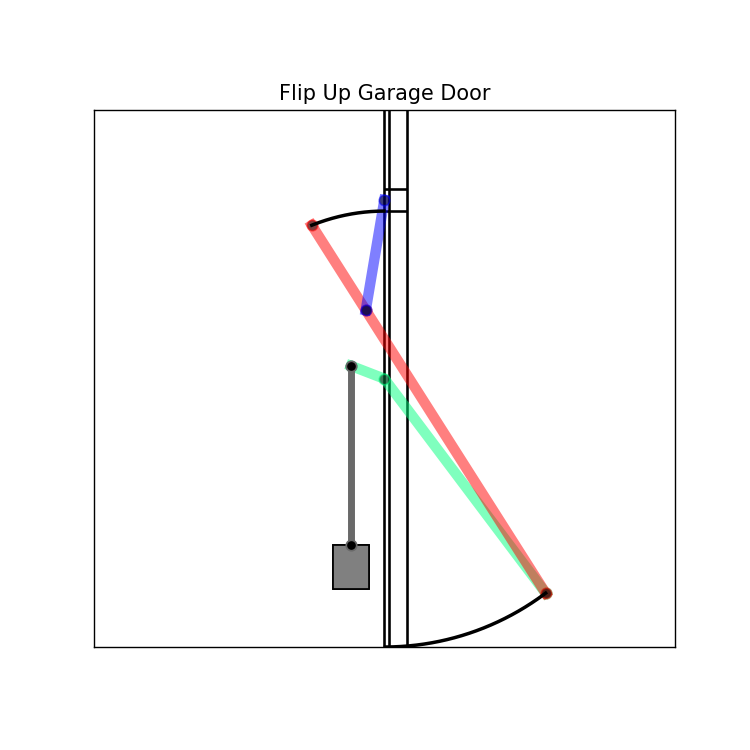

In [3]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                    xlim=(-R - 10, R + 10), ylim=(-R, R))

plt.title("Flip Up Garage Door")

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

# The wall
ax.axvline(x=0, color='k')
ax.axvline(x=2, color='k')
ax.axvline(x=10, color='k')
ax.hlines(y=[l - R + r - 5, l - R + r + 5], xmin=0, xmax=10, colors='k')

# All initializations
# Programmer only: Variables for visualization
# Number of Frames
frames = 2000
# Frames for gate to stay open
stay = 25
# Angle by which the lower bar rises every frame
dtheta = rotang / (frames // 2)
# Interval between each frames in milliseconds
interval = 10
# Angle theta
theta = 0.0

# The initializations of bars/components
R_bar, = ax.plot([], [], c='springgreen', lw=6, marker='o', alpha=0.5, mfc='k')
wb_bar, = ax.plot([], [], c='dimgray', lw=4, marker='o', mfc='k')
blkwt = plt.Rectangle((- w_h * np.sin(rotang + angae) - w/2, - w_h * np.cos(rotang + angae) - w_l),
                     w, w_l, fc='gray', ec='k')
gate, = ax.plot([], [], c='red', lw=6, marker='o', alpha=0.5, mfc='k')
r_bar, = ax.plot([], [], c='blue', lw=6, marker='o', alpha=0.5, mfc='k')
gep, = ax.plot([], [], c='k', lw=2)
gep_l, = ax.plot([], [], c='k', lw=2)

# Pre-calculate each point for easy retrieval
rendered_pts = []
gep_x = []
gep_y = []
gepl_x = []
gepl_y = []
for i in range(frames // 2):
    global theta
    theta += dtheta
    rendered_pts.append(render_points(theta))
    
def gate_end_show(retrieve, g_pts):
    global gep_x, gep_y, gepl_x, gepl_y
    if retrieve != -1 and retrieve != 0:
        gep_x.append(g_pts[0][2])
        gep_y.append(g_pts[1][2])
        gepl_x.append(g_pts[0][0])
        gepl_y.append(g_pts[1][0])
    else:
        gep_x = []
        gep_y = []
        gepl_x = []
        gepl_y = []
    return [gep_x, gep_y], [gepl_x, gepl_y]

# Init function of Animator
def init():
    R_bar.set_data([], [])
    wb_bar.set_data([], [])
    ax.add_patch(blkwt)
    gate.set_data([], [])
    r_bar.set_data([], [])
    gep.set_data([], [])
    gep_l.set_data([], [])
    return R_bar, wb_bar, blkwt, gate, r_bar, gep, gep_l

# Animate function of Animator
def animate(frame):
    if frame < (frames // 2):
        retrieve = frame
    elif frame >= (frames // 2 + stay):
        retrieve = frames // 2 + stay - frame
    else:
        retrieve = -1
    
    R_pts, wbb_pts, wt_pts, g_pts, r_pts = rendered_pts[retrieve]
    R_bar.set_data(R_pts[0], R_pts[1])
    wb_bar.set_data(wbb_pts[0], wbb_pts[1])
    blkwt.set_xy(wt_pts)
    gate.set_data(g_pts[0], g_pts[1])
    r_bar.set_data(r_pts[0], r_pts[1])
    
    g1, g2 = gate_end_show(retrieve, g_pts)
    gep.set_data(*g1)
    gep_l.set_data(*g2)
    
    return R_bar, wb_bar, blkwt, gate, r_bar, gep, gep_l

# Animation Module
ani = animation.FuncAnimation(fig, animate, 
                              frames=(frames + stay),
                              interval=interval,
                              repeat=True, 
                              init_func=init, 
                              blit=True)

# Show plot
plt.show()